# 📝 Pattern Recognition & Biometrics. TP Classification

Par Omar Galarraga et Sonia Garcia

Binome: CHEAM Richard, NOUV Ratanakmuny

Nous nous intéresserons à un cas de classification à 3 classes. Nous voudrions prédire l'espèce de manchot en se basant sur des mesures anatomiques (adapté de l'INRIA [s/d]).

Nous utiliserons pour cela une partie des données du [Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/),
disponibles dans `./datasets/penguins_classification.csv`.

Chaque manchot de la base de données, appartient à un des trois espèces du genre Pygoscelis illustrées ci-dessous, à savoir : Adélie, Papou (*Gentoo*), et Jugulaire (*Chinstrap*).

![Image of penguins](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/lter_penguins.png)

La classification se fera à partir de deux variables montrées dans la figure ci-dessous, à savoir : longueur et profondeur du bec (*bill/culmen length* et *bill/culmen depth* respectivement).

![Image of culmen](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/culmen_depth.png)

## Partie I. Classification linéaire : Classification bayésienne naïve

Commençons par charger les données et faire un peu d'exploration...

In [ ]:
import pandas

##Si besoin de Google Colab
from google.colab import files
files.upload()
PenguinData = pandas.read_csv("penguins_classification.csv")

# PenguinData = pandas.read_csv("./datasets/penguins_classification.csv")
PenguinData[:]

Saving penguins_classification.csv to penguins_classification (1).csv


,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie
...,...,...,...
337,55.8,19.8,Chinstrap
338,43.5,18.1,Chinstrap
339,49.6,18.2,Chinstrap
340,50.8,19.0,Chinstrap


Regardons le nombre d'exemples par espèce...

In [ ]:
PenguinData["Species"].value_counts()

Species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

* I.1) Calculer la probabilité *a priori* pour chaque classe

In [ ]:
#Response:

# Function to calculate prior probabilities for each class
def calculate_prior_probabilities(Species):
    class_counts = {}
    total_count = len(Species)
    prior_probabilities = {}

    # Count the occurrences of each class
    for Specie in Species:
        if Specie in class_counts:
            class_counts[Specie] += 1
        else:
            class_counts[Specie] = 1

    # Calculate the prior probability for each class
    for Specie, count in class_counts.items():
        prior_probabilities[Specie] = count / total_count

    return prior_probabilities

prior_probabilities = calculate_prior_probabilities(PenguinData["Species"])
print("Prior Probabilities:", prior_probabilities)


Prior Probabilities: {'Adelie': 0.4415204678362573, 'Gentoo': 0.35964912280701755, 'Chinstrap': 0.19883040935672514}


Regardons les histogrammes des variables d'entrée...

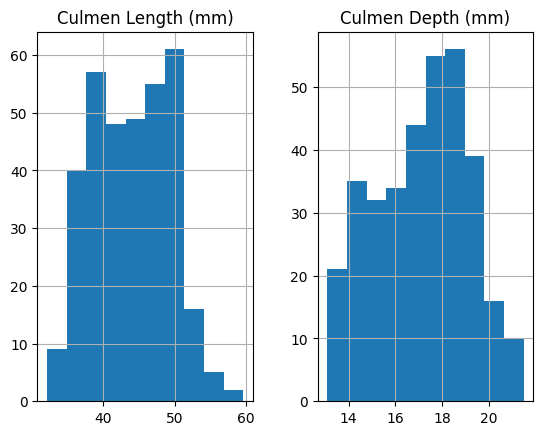

In [ ]:
%matplotlib inline
_ = PenguinData.hist()

Maintenant regardez la distribution des variables selon les classes.
* I.2) Peut-on trouver des séparateurs linéaires entre les classes ?

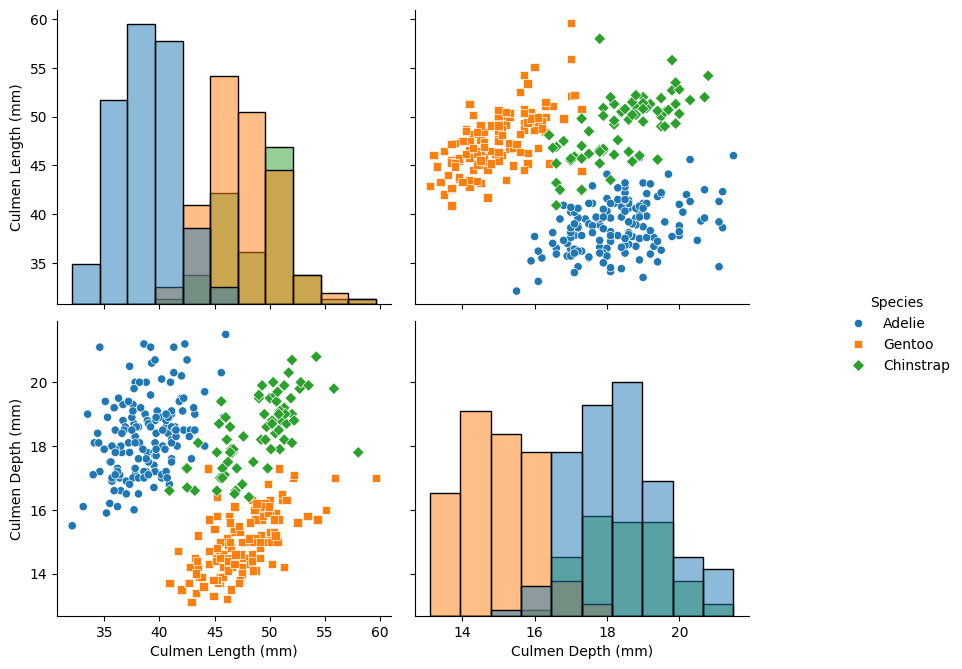

In [ ]:
import seaborn as sns
pairplot_figure = sns.pairplot(data = PenguinData, hue = "Species", diag_kind="hist", markers = ["o", "s", "D"])
pairplot_figure.fig.set_size_inches(10, 7)

**Response**:

I.2). No, we can't find the linear separators for all three type of the species because:
  - In Culmen's length histogram, it seems like the distribution of Gentoo and Chinstrap are mixed between the edge of these two groups but we can separate it from Adelie which it seems to cluster together.
  - In Culmen's depth histogram, the distribution of Adelie and Chinstrap are mixed between the edge of these two groups but we can separate it from Gentoo which it seems to cluster togther.
  - It could be more complex for the Chinstrap species due to overlapping data points.

Maintenant nous allons refaire le graphique précédent en remplaçant les histogrammes par des estimations par noyau des fonctions de densité de probabilité par classe.
* I.3) Peut-on classifier avec une seule variable ?
* I.4) Proposez une règle de décision en combinant les deux variables.

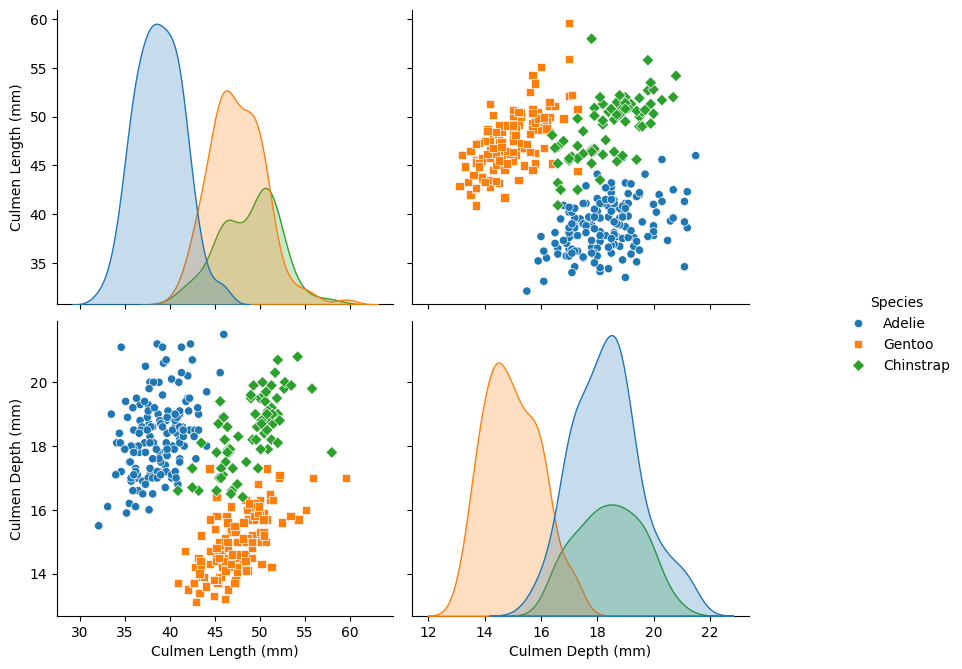

In [ ]:
import seaborn as sns
pairplot_figure2 = sns.pairplot(data = PenguinData, hue = "Species", diag_kind="kde", markers = ["o", "s", "D"])
pairplot_figure2.fig.set_size_inches(10, 7)

**Response**:

I.3). From the graphics that we have seen, we cannot classify with one variable.

I.4). Propose a decision rule combining both variables for a naive Bayesian classifier:

  - Let $x = (x_1, x_2)$ be the observed data point where $x_1$ is the CulmenLength and $x_2$ is the CulmenDepth.
  - For each class $c_i$ (Adélie, Chinstrap, Gentoo), compute the posterior probability:

$$P(c_i|x) \propto P(x|c_i) \cdot P(c_i)$$ where the Prior Probabilities $P(c_i)$ for each class (species)

  - From the distribution graphics, we can see that for $x$ given $c_i$ follow normal distributions, the likelihood is:

$$P(x|c_i) = P(x_1|c_i) \cdot P(x_2|c_i)$$

  - For each variable $x_j$ (where $j$ is either 1 or 2), the probability density function under class $c_i$ is:

$$P(x_j|c_i) = \frac{1}{\sqrt{2\pi\sigma_{ji}^2}} e^{-\frac{(x_j - \mu_{ji})^2}{2\sigma_{ji}^2}}$$

where $\mu_{ji}$ and $\sigma_{ji}^2$ are the mean and variance of variable $x_j$ for class $c_i$.

  - Combine these to form the joint likelihood:

$$P(x|c_i) = \frac{1}{2\pi\sigma_{1i}\sigma_{2i}} e^{-\left(\frac{(x_1 - \mu_{1i})^2}{2\sigma_{1i}^2} + \frac{(x_2 - \mu_{2i})^2}{2\sigma_{2i}^2}\right)}$$

  - The decision rule is to assign $x$ to the class for which $P(c_i|x)$ is largest:

$$\hat{c} = \arg\max_{i} P(c_i|x)$$

In practice, this compares the calculated posterior probabilities for each class and choosing the class with the highest probability.

  - For Adélie vs Chinstrap, the rule is:

$$\text{If } \frac{P((x_1, x_2)|\text{Adélie}) \cdot P(\text{Adélie})}{P((x_1, x_2)|\text{Chinstrap}) \cdot P(\text{Chinstrap})} > 1, \text{ classify as Adélie; else, Chinstrap.}$$

  - For Chinstrap vs Gentoo, the rule is:

$$\text{If } \frac{P((x_1, x_2)|\text{Chinstrap}) \cdot P(\text{Chinstrap})}{P((x_1, x_2)|\text{Gentoo}) \cdot P(\text{Gentoo})} > 1, \text{ classify as Chinstrap; else, Gentoo.}$$

To determine the specific decision boundaries, we use the training data to estimate $\mu_{ji}$, $\sigma_{ji}^2$, and $P(c_i)$ for each class and variable. Then, we apply these rules to new observations to classify them.


* I.5) Créez un classifieur bayésien naïf, à partir des données *data_train* et *target_train* définies ci-dessous, pour prédire l'espèce des manchots (Piste : donnez la classe qui maximise la probabilité $ P(c/x) $)

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']], PenguinData[["Species"]], test_size=0.3, shuffle=True, random_state=42)

#Response by using direct function in scikit-learn
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(data_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* I.6) Faites des prédictions pour tous les exemples dans *data_test* et comparez avec les vraies classes dans *target_test*. Calculez le taux d'erreur du classifieur.

In [ ]:
#Ecrivez votre code ici
# Make predictions for each data point in the test set
predictions = model.predict(data_test)

# Calculate accuracy
from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n', confusion_matrix(target_test, predictions))
print('Accuracy:', model.score(data_test, target_test))

error = 1-model.score(data_test, target_test)
print('Classifier error rate:', error)

Confusion matrix:
 [[46  4  0]
 [ 1 18  0]
 [ 0  1 33]]
Accuracy: 0.941747572815534
Classifier error rate: 0.058252427184465994


* I.7) Calculez le risque d'erreur minimale du classifieur (vous pouvez d'abord trouver les seuils analytiquement). Comparez avec le taux d'erreur calculé précédemment.

Calculating the minimal risk of error for a classifier between two classes $c_1$ and $c_2$ with the decision threshold $x_0$, we can use this formula:

$$\mathbb{P}(Error) = \mathbb{P}(c_2)\int\limits_{-\infty}^{x_0} \mathbb{P}(x|c_2)dx + \mathbb{P}(c_1)\int\limits_{x_0}^{+\infty} \mathbb{P}(x|c_1)dx$$

However, we haven't found threshold yet. To find it, we have to calculate by given the posterior probability of $c_1$ equal to the posterior probability of $c_2$ :

$$\mathbb{P}(c_1|x) = \mathbb{P}(c_2|x)$$

By Bayes' formula:
$$\frac{\mathbb{P}(x|c_1)\mathbb{P}(c_1)}{\mathbb{P}(x)} = \frac{\mathbb{P}(x|c_2)\mathbb{P}(c_2)}{\mathbb{P}(x)}$$

Then,

$$\mathbb{P}(x|c_1)\mathbb{P}(c_1) = \mathbb{P}(x|c_2)\mathbb{P}(c_2)$$

Then, we have this explicite form:

$$\frac{1}{\sqrt{2\pi \sigma_{c_1}^2}}exp(-\frac{1}{2}(\frac{x-\mu_{c_1}}{\sigma_{c_1}})^2)\mathbb{P}(c_1) = \frac{1}{\sqrt{2\pi \sigma_{c_2}^2}}exp(-\frac{1}{2}(\frac{x-\mu_{c_2}}{\sigma_{c_2}})^2)\mathbb{P}(c_2)$$

$$-\frac{1}{2}(\frac{x-\mu_{c_1}}{\sigma_{c_1}})^2 + \frac{1}{2}(\frac{x-\mu_{c_2}}{\sigma_{c_2}})^2 = ln(\frac{\mathbb{P}(c_2)\sigma_{c_1}}{\mathbb{P}(c_1)\sigma_{c_2}})$$

$$-\frac{1}{\sigma_{c_1}^2}(x^2-2\mu_{c_1}x + \mu_{c_1}^2) + \frac{1}{\sigma_{c_2}^2}(x^2-2\mu_{c_2}x + \mu_{c_2}^2) = 2ln(\frac{\mathbb{P}(c_2)\sigma_{c_1}}{\mathbb{P}(c_1)\sigma_{c_2}})$$

$$(\frac{1}{\sigma_{c_2}^2}-\frac{1}{\sigma_{c_1}^2})x^2 + 2(\frac{\mu_{c_1}}{\sigma_{c_1}^2} - \frac{\mu_{c_2}}{\sigma_{c_2}^2})x + (\frac{\mu_{c_2}^2}{\sigma_{c_2}^2} - \frac{\mu_{c_1}^2}{\sigma_{c_1}^2} - 2ln(\frac{\mathbb{P}(c_2)\sigma_{c_1}}{\mathbb{P}(c_1)\sigma_{c_2}})) = 0$$


At the end, we can solve this equation to find threshold $x$

In [ ]:
#Ecrivez votre code ici
import numpy as np
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm
from scipy.integrate import quad

classes = PenguinData['Species'].unique()

class_features = {}
for species in classes:
    class_data = PenguinData[PenguinData['Species'] == species]
    class_features[species] = {
        'Culmen Length (mm)': {'mean': class_data['Culmen Length (mm)'].mean(), 'std': class_data['Culmen Length (mm)'].std()},
        'Culmen Depth (mm)': {'mean': class_data['Culmen Depth (mm)'].mean(), 'std': class_data['Culmen Depth (mm)'].std()}
    }

def solve_decision_threshold(c1, c2, p1, p2):
    # c1 and c2 are dictionaries containing the mean and std of the two distributions
    mean1, std1 = c1['mean'], c1['std']
    mean2, std2 = c2['mean'], c2['std']

    # Quadratic equation coefficients
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = mean2/(std2**2) - mean1/(std1**2)
    c = mean1**2 /(2*std1**2) - mean2**2 /(2*std2**2) - np.log((std2*np.sqrt(p1))/(std1*np.sqrt(p2)))

    # Solutions to the quadratic equation
    return np.max(np.roots([a, b, c]))

def minimal_risk_error(c1, c2, p1, p2, threshold):
    def integrand(x):
        return min(p1 * norm.pdf(x, loc=c1['mean'], scale=c1['std']),
                   p2 * norm.pdf(x, loc=c2['mean'], scale=c2['std']))

        # Determine which mean is greater to set up integral limits
    if c1['mean'] < c2['mean']:
        # c1 is to the left of c2, integrate from -inf to threshold
        area1, _ = quad(integrand, -np.inf, threshold)
        # c2 is to the right of c1, integrate from threshold to +inf
        area2, _ = quad(integrand, threshold, np.inf)
    else:
        # c2 is to the left of c1, integrate from -inf to threshold
        area2, _ = quad(integrand, -np.inf, threshold)
        # c1 is to the right of c2, integrate from threshold to +inf
        area1, _ = quad(integrand, threshold, np.inf)

    # The total error is the sum of the two areas
    return area1 + area2

# Find the thresholds for the Culmen Length
# The threshold between Adelie and Chinstrap
x_l_ac = solve_decision_threshold(class_features['Adelie']['Culmen Length (mm)'], class_features['Chinstrap']['Culmen Length (mm)'], prior_probabilities['Adelie'], prior_probabilities['Chinstrap'])
# The threshold between Adelie and Gentoo
x_l_ag = solve_decision_threshold(class_features['Adelie']['Culmen Length (mm)'], class_features['Gentoo']['Culmen Length (mm)'], prior_probabilities['Adelie'], prior_probabilities['Gentoo'])

# Find the thresholds for the Culment Depth
# The threshold between Gentoo and Adelie
x_d_ga = solve_decision_threshold(class_features['Gentoo']['Culmen Depth (mm)'], class_features['Adelie']['Culmen Depth (mm)'], prior_probabilities['Gentoo'], prior_probabilities['Adelie'])
# The threshold betwwen Gentoo and Chinstrap
x_d_gc = solve_decision_threshold(class_features['Gentoo']['Culmen Depth (mm)'], class_features['Chinstrap']['Culmen Depth (mm)'], prior_probabilities['Gentoo'], prior_probabilities['Chinstrap'])

# Find the minimal risk of error
# Error between Adelie and Chinstrap
error_l_ac = minimal_risk_error(class_features['Adelie']['Culmen Length (mm)'], class_features['Chinstrap']['Culmen Length (mm)'], prior_probabilities['Adelie'], prior_probabilities['Chinstrap'], x_l_ac)
# Error between Adelie and Gentoo
error_l_ag = minimal_risk_error(class_features['Adelie']['Culmen Length (mm)'], class_features['Gentoo']['Culmen Length (mm)'], prior_probabilities['Adelie'], prior_probabilities['Gentoo'], x_l_ag)
# Error between Gentoo and Adelie
error_d_ga = minimal_risk_error(class_features['Gentoo']['Culmen Depth (mm)'], class_features['Adelie']['Culmen Depth (mm)'], prior_probabilities['Gentoo'], prior_probabilities['Adelie'], x_d_ga)
# Error betwwen Gentoo and Chinstrap
error_d_gc = minimal_risk_error(class_features['Gentoo']['Culmen Depth (mm)'], class_features['Chinstrap']['Culmen Depth (mm)'], prior_probabilities['Gentoo'], prior_probabilities['Chinstrap'],x_d_gc)


print("The minimal risk of error between Adelie and Chinstrap: ",error_l_ac)
print("The minimal risk of error between Adelie and Gentoo: ",error_l_ag)
print("The minimal risk of error between Gentoo and Adelie: ",error_d_ga)
print("The minimal risk of error between Gentoo and Chinstrap: ",error_d_gc)

The minimal risk of error between Adelie and Chinstrap:  0.025740404318517714
The minimal risk of error between Adelie and Gentoo:  0.050805797112908516
The minimal risk of error between Gentoo and Adelie:  0.05041180111986987
The minimal risk of error between Gentoo and Chinstrap:  0.02674758661968829


In [ ]:
#Compare classifier error rate
if error_l_ac > error_l_ag:
  print("The difference for Culmen Length: ",error - error_l_ac)
else:
  print("The difference for Culmen Length: ",error - error_l_ag)

if error_d_ga > error_d_gc:
  print("The difference for Culmen Depth: ",error - error_d_ga)
else:
  print("The difference for Culmen Depth: ",error - error_d_gc)

The difference for Culmen Length:  0.007446630071557478
The difference for Culmen Depth:  0.007840626064596123


According to result, we can see that classifier error rate is bigger than all the minimal risk of the errors but not much.

## Partie II. Classification non linéaire avec réseaux de neurones

Nous appliquerons un réseau de neurones type Perceptron Multicouche (PMC) ou *feedforward neural network* à la même problématique de classification.

Nous commencerons par le prétraitement des données. Afin que les entrées aient la même importance dans le modèle, il est impératif de normaliser les données. Dans ce cas, nous allons centrer et réduire les entrées (soustraire la moyenne et diviser par l'écart-type).
De la même façon, nous devons convertir les étiquettes en variables quantitatives pour pouvoir insérer ces données dans le modèle neuronal. Nous utiliserons un codage en vecteurs binaires, comme ci-dessous :


$$
\begin{array}{ccc}
Adelie & \rightarrow & \left(1\,0\,0\right)^T\\
Gentoo & \rightarrow & \left(0\,1\,0\right)^T\\
Chinstrap & \rightarrow & \left(0\,0\,1\right)^T\\
\end{array}
$$

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

input_preprocessor = StandardScaler()
target_preprocessor = OneHotEncoder(sparse=False)

data = input_preprocessor.fit_transform(PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']])
target = target_preprocessor.fit_transform(PenguinData[['Species']])

normdf = pandas.DataFrame(np.concatenate((PenguinData[['Culmen Length (mm)', 'Culmen Depth (mm)']], data), axis=1), columns=['Var1', 'Var2', 'Var1 norm', 'Var2 norm'])
print("Données d'entrée normalisées")
print(normdf[:10])
print("Sortie désirée")
print(pandas.DataFrame(target, columns=['Adelie', 'Gentoo', 'Chinstrap']))

Données d'entrée normalisées
   Var1  Var2  Var1 norm  Var2 norm
0  39.1  18.7  -0.884499   0.785449
1  39.5  17.4  -0.811126   0.126188
2  40.3  18.0  -0.664380   0.430462
3  36.7  19.3  -1.324737   1.089724
4  39.3  20.6  -0.847812   1.748985
5  38.9  17.8  -0.921185   0.329038
6  39.2  19.6  -0.866155   1.241861
7  34.1  18.1  -1.801661   0.481175
8  42.0  20.2  -0.352544   1.546135
9  37.8  17.1  -1.122961  -0.025949
Sortie désirée
     Adelie  Gentoo  Chinstrap
0       1.0     0.0        0.0
1       1.0     0.0        0.0
2       1.0     0.0        0.0
3       1.0     0.0        0.0
4       1.0     0.0        0.0
..      ...     ...        ...
337     0.0     1.0        0.0
338     0.0     1.0        0.0
339     0.0     1.0        0.0
340     0.0     1.0        0.0
341     0.0     1.0        0.0

[342 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Maintenant nous construisons un PMC à une seule couche cachée avec $m = 2$ neurones
* II.1) Quelle est la taille de la *couche d'entrée* ?
* II.2) Quelle est la taille de la couche de sortie ?

**Response**:'

II.1) The size of the input layer is $\textbf{2}$ (Culmen Length and Culmen Depth).

II.2) The size of the output layer is $\textbf{3}$ (Adeliem, Gentoo, and Chinstrap).

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
m = 2
mlpmodel = MLPClassifier(hidden_layer_sizes=(m, ), activation="logistic", solver="lbfgs", max_iter=500)
set_config(display='diagram')
mlpmodel

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=500,
              solver='lbfgs')

Pour pouvoir entraîner le PMC et tester sa capacité de généralisation, il faut :
* a) Après avoir changé aléatoirement l'ordre des observations, séparer les données en ensembles d'apprentissage ($70\%$) et de test ($30\%$)
* b) Entraîner le modèle avec les données d'apprentissage
* c) Prédire les valeurs pour les données de test  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=42)

#Training
mlpmodel.fit(X_train, y_train)

pred_tr = mlpmodel.predict(X_train)
pred_tr_label = target_preprocessor.inverse_transform(pred_tr) #Décodage des vecteurs binaires
train_label = target_preprocessor.inverse_transform(y_train)

#Test
pred_test = mlpmodel.predict(X_test)
pred_test_label = target_preprocessor.inverse_transform(pred_test)
test_label = target_preprocessor.inverse_transform(y_test)
table_test = pandas.DataFrame(np.concatenate((pred_test_label,test_label), axis=1), columns=['Prédictions', 'Vraies'])
table_test[65:75]

,Prédictions,Vraies
65,Chinstrap,Adelie
66,Adelie,Adelie
67,Adelie,Adelie
68,Adelie,Adelie
69,Adelie,Adelie
70,Adelie,Adelie
71,Adelie,Adelie
72,Chinstrap,Chinstrap
73,Adelie,Chinstrap
74,Chinstrap,Chinstrap


Combien d'erreurs de classification se trouvent dans le tableau ci-dessus ?

* Calcul de la performance du modèle :

**Response**

In [ ]:
#Classification errors
def count_error(y_hat, y): #y and y_hat are arrays
    res = 0
    for i in range(len(y_hat)):
        if y_hat[i] != y[i]:
            res += 1
    return res

predicition = table_test['Prédictions'].values
real = table_test['Vraies'].values

total_error = count_error(predicition, real)
print(f"Erros that the classification made based on the table above is {total_error}")
print("Confusion matrix is given by: ")
pandas.crosstab(real, predicition)

Erros that the classification made based on the table above is 2
Confusion matrix is given by: 


col_0,Adelie,Chinstrap,Gentoo
row_0,,,
Adelie,49,1,0
Chinstrap,1,18,0
Gentoo,0,0,34


In [ ]:
#Performance training
acc_tr = (pred_tr_label == train_label).mean()

#Performance test
acc_test = (pred_test_label == test_label).mean()

print(f"La performance en apprentissage est de {acc_tr:.4f}")
print(f"La performance en test est de {acc_test:.4f}")

La performance en apprentissage est de 0.9707
La performance en test est de 0.9806


Nous avons testé la performance du modèle pour un seul ensemble de test. Afin d'avoir une meilleure estimation de la performance du modèle, nous devons réaliser une validation croisée.
* II.3) Réalisez une validation croisée de type K-fold avec $K=10$ (n'oubliez pas de *mélanger* les données avant). Calculer la moyenne et l'écart-type des performances d'apprentissage et de test.

In [ ]:
#Ecrivez votre code ici
import numpy as np
from sklearn.model_selection import KFold, cross_validate

m = 2
mlpmodel = MLPClassifier(hidden_layer_sizes=(m, ), activation="logistic", solver="lbfgs", max_iter=500)

nb_fold = 10
k_fold = KFold(n_splits = nb_fold, shuffle = True)
cv_res = cross_validate(mlpmodel, data, target, cv = k_fold, return_train_score = True)

print("The mean of training performance: ", np.mean(cv_res['train_score']))
print("The standard deviation of training performance: ", np.std(cv_res['train_score']))
print("\n")
print("The mean of testing performance: ", np.mean(cv_res['test_score']))
print("The standard deviation of testing performance: ", np.std(cv_res['test_score']))

The mean of training performance:  0.9684842844451966
The standard deviation of training performance:  0.005453635178958789


The mean of testing performance:  0.9531932773109244
The standard deviation of testing performance:  0.02694335716731004


Nous avons arbitrairement choisi $m=2$ pour le nombre de neurones dans la couche cachée. Le nombre de neurones cachés optimal $m_{opt}$ se trouve de manière empirique en faisant varier la valeur de $m$ et en évaluant la performance.
* II.4) Trouvez $m_{opt}$ dans l'intervalle  $\left[2, 10\right]$ en réalisant une validation croisée type *10-fold* pour chaque valeur de $m$. Quelle est la performance du modèle avec $m=m_{opt}$ ?

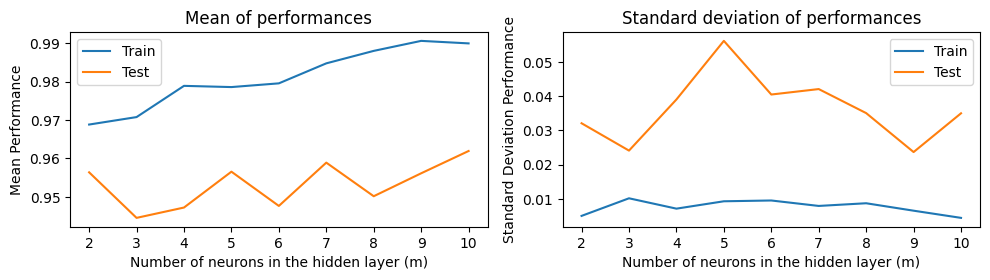

By considering the testing performance, we then have: 
- m_opt = 10
- The average cross-validation performance of m_opt = 0.9619327731092436


By considering the testing performance, if we aim for the consistency, we will then have: 
- m_opt = 9
- The average cross-validation performance of m_opt = 0.02366646758039563


In [ ]:
#Ecrivez votre code ici
import matplotlib.pyplot as plt

#init interval of number of neurons in hidden layer and number of fold
m_list = np.arange(2, 11)
nb_fold = 10

#init list to store result
mean_train_list = []
std_train_list = []
mean_test_list = []
std_test_list = []

for m_ in m_list:
    mlpmodel = MLPClassifier(hidden_layer_sizes=(m_, ), activation="logistic", solver="lbfgs", max_iter=2000) #increase max_iter to avoid warning
    k_fold = KFold(n_splits = nb_fold, shuffle = True)
    cv_res = cross_validate(mlpmodel, data, target, cv = k_fold, return_train_score = True)
    mean_train_list.append(np.mean(cv_res['train_score']))
    std_train_list.append(np.std(cv_res['train_score']))
    mean_test_list.append(np.mean(cv_res['test_score']))
    std_test_list.append(np.std(cv_res['test_score']))

#plot performance
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)  # (size of plot) | subplot 1 (2x2, first plot)
plt.title('Mean of performances')
plt.plot(m_list, mean_train_list, label='Train')
plt.plot(m_list, mean_test_list, label='Test')
plt.xlabel('Number of neurons in the hidden layer (m)')
plt.ylabel('Mean Performance')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Standard deviation of performances')
plt.plot(m_list, std_train_list, label='Train')
plt.plot(m_list, std_test_list, label='Test')
plt.xlabel('Number of neurons in the hidden layer (m)')
plt.ylabel('Standard Deviation Performance')
plt.legend()

# adjust spacing between subplots
plt.tight_layout()

plt.show()

print("By considering the testing performance, we then have: ")
ind_mean = mean_test_list.index(max(mean_test_list)) #get index which mean_test_list is the biggest
m_opt_mean = m_list[ind_mean]
print("- m_opt =", m_opt_mean)
print('- The average cross-validation performance of m_opt =', max(mean_test_list))
print("\n")
print("By considering the testing performance, if we aim for the consistency, we will then have: ")
ind_std = std_test_list.index(min(std_test_list)) #get index which std_list is the smallest
m_opt_std =  m_list[ind_std]
print("- m_opt =", m_opt_std)
print('- The average cross-validation performance of m_opt =', min(std_test_list))

Enfin, nous aimerions connaître l'effet de la taille de l'ensemble d'apprentissage sur la performance du modèle.
* II.5) Calculez la performance en fonction de la taille de l'ensemble d'apprentissage pour $n \in \left\{10, 50,  100, 150, 200, 250, 300, 342\right\}$ (Validation croisée *10-fold* pour $m=m_{opt}$ et chaque valeur de $n$).
* II.6) Montrez la courbe d'apprentissage (vous pouvez utiliser matplotlib.pyplot.plot pour montrer les performances d'apprentissage et de test sur le même graphique). A partir de quelle valeur de $n$ le modèle atteint-il son potentiel maximal ($Acc\_test \approx Acc\_train$) ?  

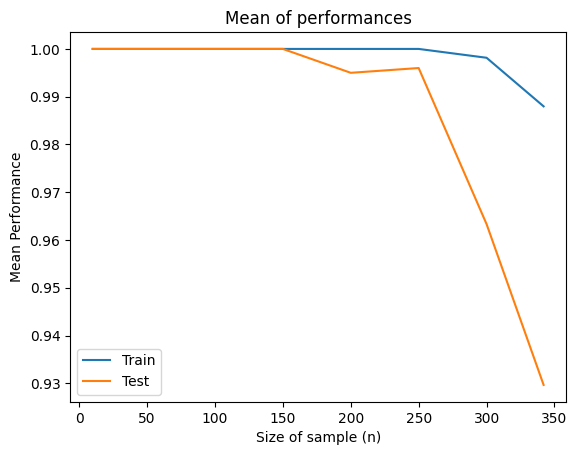

In [ ]:
#Ecrivez votre code ici

#initialization
n_list = [10, 50, 100, 150, 200, 250, 300, 342]
nb_fold = 10
m_opt = m_opt_mean
mean_train_list = []
mean_test_list = []

#loop for all size n
for n_ in n_list:
    mlpmodel = MLPClassifier(hidden_layer_sizes=(m_opt, ), activation="logistic", solver="lbfgs", max_iter=2000)
    k_fold = KFold(n_splits = nb_fold, shuffle = True)
    cv_res = cross_validate(mlpmodel, data[:n_], target[:n_], cv = k_fold, return_train_score = True)
    mean_train_list.append(np.mean(cv_res['train_score']))
    mean_test_list.append(np.mean(cv_res['test_score']))

#plot performance
plt.title('Mean of performances')
plt.plot(n_list, mean_train_list, label='Train')
plt.plot(n_list, mean_test_list, label='Test')
plt.xlabel('Size of sample (n)')
plt.ylabel('Mean Performance')
plt.legend()

II.6). As we can see from the graphic above, from value $n = 10$ until $n = 250$ is when the performance of train and test start reaching its maximum potential ($Acc\_test \approx Acc\_train$).